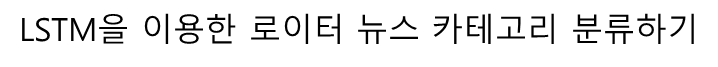

- 입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업이라고 할 수 있음
- 예를 들어 “안녕. 오늘 날씨가 참 좋네”라는 말은 ‘인사’ 카테고리에 분류해야 함
- 아래와 같이 조금 더 길고 전문적인 말도 정확하게 분류해야 함

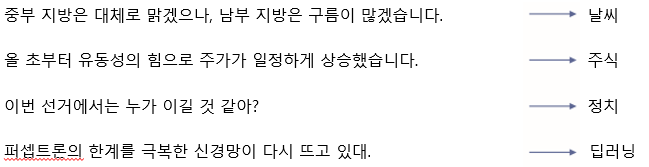

- 긴 텍스트를 읽고 이 데이터가 어떤 의미를 지니는지 카테고리로 분류
- 로이터 뉴스 데이터는, 총 11,258개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [3]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters

In [5]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [6]:
# 불러온 데이터를 학습셋, 테스트셋으로 나누기
# test_split : 인자를 통해 20%를 테스트셋으로 사용
# num_words : 모든 단어를 다 사용하는 것은 비효율적이므로 빈도가 높은 단어만 불러와 사용
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])
#숫자로 변환한 다음 학습할 수 있음
#여기서는 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙임
#예를 들어, 3이라고 하면 세 번째로 빈도가 높은 단어라는 뜻

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


 - 전처리 함수 sequence로 각 기사의 단어 수가 제각각 다르므로 단어의 숫자를 맞춰야 함.


In [ ]:
# 데이터 전처리
# maxlen=100은 단어 수를 100개로 맞추라는 뜻
# 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림
# 100에서 모자랄 때는 모자라는 부분을 모두 0으로 채움
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

# One-hot encoding 처리
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
# 모델 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


- Embedding 층과 LSTM 층으로 구성
- Embedding 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을 함
- Embedding('불러온 단어의 총 개수', '기사당 단어 수') 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 함
- LSTM은 RNN에서 기억 값에 대한 가중치를 제어
- LSTM(기사당 단어 수, 기타 옵션)의 형태로 적용됨
- LSTM의 활성화 함수로는 Tanh를 사용

In [ ]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 10s 22ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 13ms/step - loss: 2.0567 - accuracy: 0.4787 - val_loss: 1.9575 - val_accuracy: 0.5058
Epoch 3/20
90/90 [==============================] - 1s 13ms/step - loss: 1.9161 - accuracy: 0.5084 - val_loss: 1.7670 - val_accuracy: 0.5419
Epoch 4/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7411 - accuracy: 0.5445 - val_loss: 1.7558 - val_accuracy: 0.5450
Epoch 5/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7526 - accuracy: 0.5450 - val_loss: 1.6767 - val_accuracy: 0.5770
Epoch 6/20
90/90 [==============================] - 1s 13ms/step - loss: 1.6437 - accuracy: 0.5787 - val_loss: 1.6584 - val_accuracy: 0.5752
Epoch 7/20
90/90 [==============================] - 1s 13ms/step - loss: 1.6277 - accuracy: 0.5810 - val_loss: 1.5797 - val_accuracy: 0.6184
Epoch 8/20
9

71/71 [==============================] - 0s 5ms/step - loss: 1.2371 - accuracy: 0.6963

 Test Accuracy: 0.6963


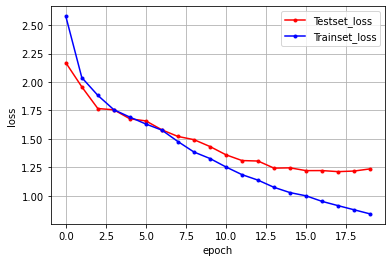

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


- 테스트셋에 대한 정확도가 0.6963을 보이고 있음
- 테스트 오차가 상승하기 전까지의 학습이 과적합 직전의 최적 학습 시간임